TASK-1: CUSTOMER CHURN PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
drop_col=['RowNumber','CustomerId','Surname']
df.drop(drop_col,axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
gen_l={'Female':0,'Male':1}
geo_l={'France':0,'Germany':1,'Spain':2}
df['Gender']=df['Gender'].map(gen_l)
df['Geography']=df['Geography'].map(geo_l)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df1=pd.get_dummies(df,drop_first=True)
df1=df1.astype(int)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
4,850,2,0,43,2,125510,1,1,1,79084,0


In [9]:
df1.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

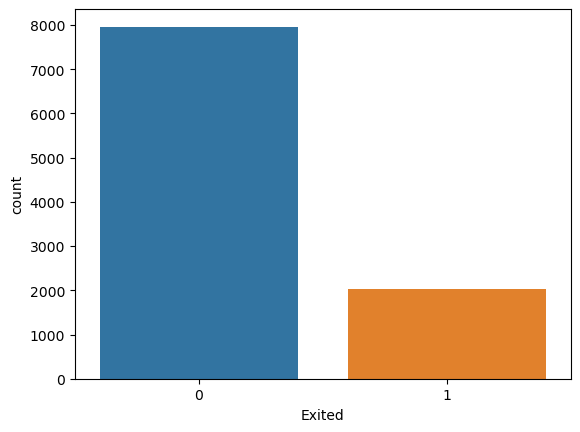

In [10]:
sns.countplot(x='Exited',data=df1)

In [11]:
x=df1.drop('Exited',axis=1)
y=df1.Exited

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [13]:
ss=StandardScaler()
x_tr_ss=ss.fit_transform(x_train)
x_te_ss=ss.fit_transform(x_test)

In [14]:
limit = 0.5
y_tr_cl = [1 if value > limit else 0 for value in y_train]
y_te_cl=[1 if value > limit else 0 for value in y_test]
LR = LogisticRegression()
LR.fit(x_tr_ss,y_tr_cl)

LogisticRegression()

In [15]:
acc1=LR.score(x_te_ss,y_te_cl)
acc1

0.8025

In [16]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_tr_ss,y_tr_cl)
acc2=svm.score(x_te_ss,y_te_cl)
acc2

0.8505

In [17]:
rf=RandomForestClassifier()
rf.fit(x_tr_ss,y_tr_cl)
acc3=rf.score(x_te_ss,y_te_cl)
acc3

0.856

In [18]:
dt=DecisionTreeClassifier()
dt.fit(x_tr_ss,y_tr_cl)
acc4=dt.score(x_te_ss,y_te_cl)
acc4

0.7835

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_tr_ss,y_tr_cl)
acc5=knn.score(x_te_ss,y_te_cl)
acc5

0.828

In [20]:
performance_table=pd.DataFrame({
    'Model':['Logistic Regression','SVM','Random Forest','Decision Tree','KNN'],
    'Accuracy':[acc1,acc2,acc3,acc4,acc5]})
performance_table

,Model,Accuracy
0,Logistic Regression,0.8025
1,SVM,0.8505
2,Random Forest,0.8560
3,Decision Tree,0.7835
4,KNN,0.8280
